In [2]:
import pandas as pd

df = pd.read_csv("/home/yair/Downloads/heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### leaving only important features

In [3]:
# Assuming your dataset is in a DataFrame called 'df'
# Keep only the specified columns
df = df[['HadHeartAttack', 'SmokerStatus', 'AgeCategory']]

# Display the filtered DataFrame
print(df.head())


  HadHeartAttack   SmokerStatus      AgeCategory
0             No  Former smoker     Age 65 to 69
1             No  Former smoker     Age 70 to 74
2             No  Former smoker     Age 75 to 79
3             No   Never smoked  Age 80 or older
4             No   Never smoked  Age 80 or older


### Fixing age category

In [4]:
import pandas as pd

# Sample function to calculate the mean of the age range
def age_category_mean(age_str):
    if "or older" in age_str:
        return int(age_str.split()[1])  # Get the age number before "or older"
    else:
        # Split the age range, convert to int, and calculate the mean
        age_range = age_str.split()[1::2]  # Extract the start and end of the range
        return sum(map(int, age_range)) // 2

# Apply the function to the 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].apply(age_category_mean)
df.head()

,HadHeartAttack,SmokerStatus,AgeCategory
0,No,Former smoker,67
1,No,Former smoker,72
2,No,Former smoker,77
3,No,Never smoked,80
4,No,Never smoked,80


### Looking at Smokerstatues

In [5]:
import pandas as pd

# Assuming df is your dataframe
unique_smoking = df['SmokerStatus'].unique()

# Print all unique values
for category in unique_smoking:
    print(category)


Former smoker
Never smoked
Current smoker - now smokes every day
Current smoker - now smokes some days


### Fixing Smoker Statues

In [6]:
# Function to map detailed smoking statuses to broader categories
def combine_current_smoking(status):
    if 'Current smoker' in status:
        return 'Current smoker'
    else:
        return status

# Apply the function to the 'SmokerStatus' column
df['SmokerStatus'] = df['SmokerStatus'].apply(combine_current_smoking)

df["SmokerStatus"].unique()

array(['Former smoker', 'Never smoked', 'Current smoker'], dtype=object)

In [7]:
# Function to map detailed smoking statuses to broader categories
def simplify_smoker_status(status):
    if 'Current smoker' in status:
        return 'Current'
    elif 'Former smoker' in status:
        return 'Former'
    elif 'Never smoked' in status:
        return 'Never'
    else:
        return 'Unknown'

# Apply the function to the 'SmokerStatus' column
df['SmokerStatus'] = df['SmokerStatus'].apply(simplify_smoker_status)

# Print the dataframe with the new column
df.head()


,HadHeartAttack,SmokerStatus,AgeCategory
0,No,Former,67
1,No,Former,72
2,No,Former,77
3,No,Never,80
4,No,Never,80


### Fixing heart attack to numerical

In [8]:
import pandas as pd

# Mapping function to convert 'Yes' to 1 and 'No' to 0
def convert_heart_attack_status(status):
    return 1 if status == 'Yes' else 0

# Apply the function to the 'HadHeartAttack' column
df['HadHeartAttack'] = df['HadHeartAttack'].apply(convert_heart_attack_status)

# Print the updated dataframe
df.head()


,HadHeartAttack,SmokerStatus,AgeCategory
0,0,Former,67
1,0,Former,72
2,0,Former,77
3,0,Never,80
4,0,Never,80


### Looking at heart attack

In [9]:
import pandas as pd

# Count the occurrences of 0 and 1
counts = df['HadHeartAttack'].value_counts()

# Print the counts
print("Count of 0 (No):", counts.get(0, 0))
print("Count of 1 (Yes):", counts.get(1, 0))


Count of 0 (No): 232587
Count of 1 (Yes): 13435


## Age distribution

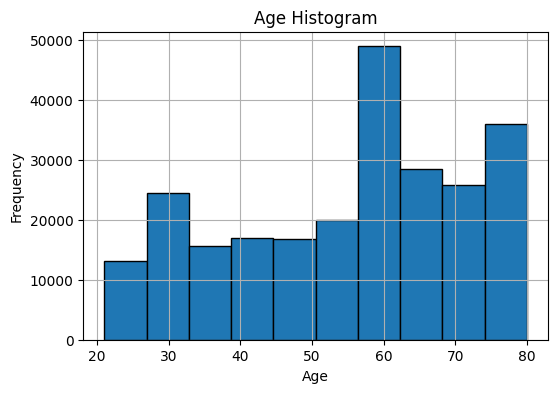

In [10]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(6, 4))
plt.hist(df['AgeCategory'], bins=10, edgecolor='black')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<BarContainer object of 3 artists>

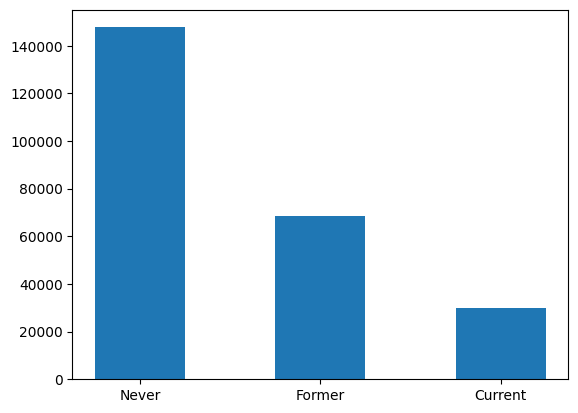

In [11]:
categories = df["SmokerStatus"].value_counts().index
counts = df["SmokerStatus"].value_counts().values
plt.bar(categories, counts, width=0.5)

### Now let's check in percentage, and try to if Former is really the best.

In [12]:
import pandas as pd

# Ensure 'HadHeartAttack' is a binary column (1 for heart attack, 0 for no heart attack)
# Group by 'SmokerStatus' and calculate the mean heart attack rate
heart_attack_proportion = df.groupby('SmokerStatus')['HadHeartAttack'].mean().reset_index()

# Sort by heart attack rate to find which smoking category has the highest risk
heart_attack_proportion = heart_attack_proportion.sort_values(by='HadHeartAttack', ascending=False)

# Display the results
print(heart_attack_proportion)


  SmokerStatus  HadHeartAttack
1       Former        0.081866
0      Current        0.079105
2        Never        0.037032


### We did get a completely different result, and now we see that the best is not being a smoker at all, and there isn't a really big difference in former and never.
### Let's check it statistially:

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['SmokerStatus'], df['HadHeartAttack'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

# Interpretation of results
if p < 0.05:
    print("There is a statistically significant difference between smoking categories and heart attacks (reject null hypothesis).")
else:
    print("There is no statistically significant difference between smoking categories and heart attacks (fail to reject null hypothesis).")


Chi2 Statistic: 2216.086624309097
p-value: 0.0
There is a statistically significant difference between smoking categories and heart attacks (reject null hypothesis).


In [14]:
from statsmodels.stats.proportion import proportions_ztest

# Filter the data for "Former" and "Current" smokers
former = df[df['SmokerStatus'] == 'Former']
current = df[df['SmokerStatus'] == 'Current']

# Count the number of heart attacks and total counts
count = [former['HadHeartAttack'].sum(), current['HadHeartAttack'].sum()]
nobs = [len(former), len(current)]

# Perform the z-test for proportions
stat, p_value = proportions_ztest(count, nobs)

# Display results
print(f"Z-statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("There is a statistically significant difference between 'Former' and 'Current' smokers (reject null hypothesis).")
else:
    print("There is no statistically significant difference between 'Former' and 'Current' smokers (fail to reject null hypothesis).")


Z-statistic: 1.4572885781460896
p-value: 0.1450367383593533
There is no statistically significant difference between 'Former' and 'Current' smokers (fail to reject null hypothesis).


## After checking is statistacally we can be assure that someone who never smoked has a much better at not getting a heart disease, while there isn't a difference between a corrent smoker and a former one.

## That means that either this dataset has a bais which prevent it from getting the right results, or our oringinal data have bais.

## now It's time to check what we found out about age.

### Our main result was that from age 50 till 70, you have the same chance of dying from a heart disease every moment, and it's not risin or slowin down in any meaningful mannner.¶ we'll start with a plot:

/tmp/ipykernel_6947/3809935500.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeCategory', y='HadHeartAttack', data=age_heartattack_proportion, palette='viridis')


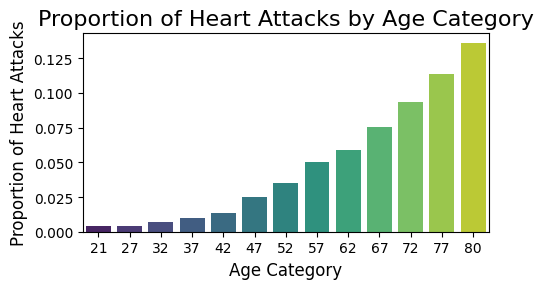

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the proportion of heart attacks by age category
age_heartattack_proportion = df.groupby('AgeCategory')['HadHeartAttack'].mean().reset_index()

# Sort by the proportion of heart attacks (optional, for better visualization)
age_heartattack_proportion = age_heartattack_proportion.sort_values(by='HadHeartAttack', ascending=False)

# Create the bar plot
plt.figure(figsize=(5, 3))
sns.barplot(x='AgeCategory', y='HadHeartAttack', data=age_heartattack_proportion, palette='viridis')

# Add labels and title
plt.title('Proportion of Heart Attacks by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Proportion of Heart Attacks', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


### And it does seems that the older you are, the better chance you have of getting a heart disease, unlike what we have shown earlier.

## Let's check normality and variance, to see if we can run anova test.

In [16]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Separate age data based on heart attack status
heart_attack_yes = df[df['HadHeartAttack'] == 1]['AgeCategory']
heart_attack_no = df[df['HadHeartAttack'] == 0]['AgeCategory']

# Check for normality using Shapiro-Wilk test
stat_yes, p_yes = stats.shapiro(heart_attack_yes)
stat_no, p_no = stats.shapiro(heart_attack_no)

print(f'Heart Attack Yes - Shapiro Test p-value: {p_yes}')
print(f'Heart Attack No - Shapiro Test p-value: {p_no}')

# Check for equal variance using Levene's test
stat_levene, p_levene = stats.levene(heart_attack_yes, heart_attack_no)

print(f'Levene’s Test for equal variances p-value: {p_levene}')

/home/yair/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13435.
  res = hypotest_fun_out(*samples, **kwds)


Heart Attack Yes - Shapiro Test p-value: 1.0434343537909275e-70
Heart Attack No - Shapiro Test p-value: 1.2653806013742092e-112
Levene’s Test for equal variances p-value: 0.0


/home/yair/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 232587.
  res = hypotest_fun_out(*samples, **kwds)


### We got a low p-value, meaning we can run anova:

In [17]:
# Perform ANOVA
stat_anova, p_anova = stats.f_oneway(heart_attack_yes, heart_attack_no)

print(f'ANOVA p-value: {p_anova}')

if p_anova < 0.05:
    print("There is a statistically significant difference in age between those who had a heart attack and those who did not.")
else:
    print("There is no statistically significant difference in age between the groups.")


ANOVA p-value: 0.0
There is a statistically significant difference in age between those who had a heart attack and those who did not.


## Now I will want to compare every pair of ages by itself, and see if where is the big difference lays.

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Sort the data by AgeCategory
df = df.sort_values(by="AgeCategory")

# Get unique age groups
age_groups = df['AgeCategory'].unique()

# Prepare a results dictionary
results = []

# Loop through each age group and compare with the next group
for i in range(len(age_groups) - 1):
    # Select the data for two consecutive age groups
    group_1 = df[df['AgeCategory'] == age_groups[i]]['HadHeartAttack']
    group_2 = df[df['AgeCategory'] == age_groups[i + 1]]['HadHeartAttack']
    
    # Create a contingency table manually
    contingency_table = [
        [sum(group_1 == 1), sum(group_1 == 0)],  # Heart attack and no heart attack counts for group_1
        [sum(group_2 == 1), sum(group_2 == 0)]   # Heart attack and no heart attack counts for group_2
    ]
    
    # Perform Chi-Square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store the results
    result = {
        'AgeGroup1': age_groups[i],
        'AgeGroup2': age_groups[i + 1],
        'P-Value': p_value,
        'Significant': p_value < 0.05  # Change significance threshold if needed
    }
    
    results.append(result)

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


    AgeGroup1  AgeGroup2       P-Value  Significant
0          21         27  6.786407e-01        False
1          27         32  1.123395e-02         True
2          32         37  3.309630e-03         True
3          37         42  4.726316e-03         True
4          42         47  9.621430e-15         True
5          47         52  1.754745e-08         True
6          52         57  1.238477e-13         True
7          57         62  1.803038e-05         True
8          62         67  1.164833e-14         True
9          67         72  3.693528e-14         True
10         72         77  4.963810e-12         True
11         77         80  1.765577e-10         True


### Let's plot it. the lower the p-value is the bigger is the chance for a difference.

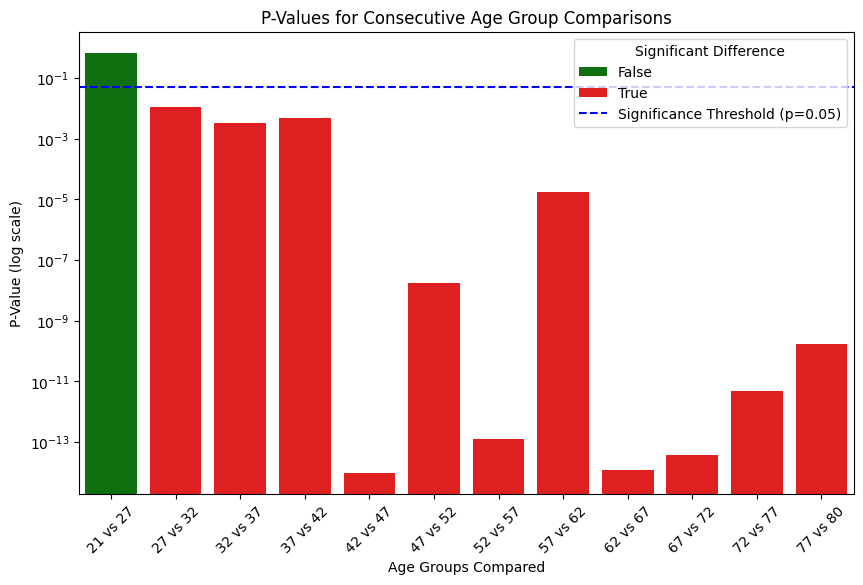

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup1', y='P-Value', hue='Significant', data=results_df, dodge=False, palette={True: 'red', False: 'green'})

# Highlighting significant p-values
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Threshold (p=0.05)')
plt.yscale('log')  # Log scale to better visualize small p-values
plt.title('P-Values for Consecutive Age Group Comparisons')
plt.xlabel('Age Groups Compared')
plt.ylabel('P-Value (log scale)')
plt.xticks(ticks=range(len(results_df)), labels=[f"{row['AgeGroup1']} vs {row['AgeGroup2']}" for _, row in results_df.iterrows()], rotation=45)
plt.legend(title="Significant Difference")

plt.show()



#### Let's see what will happend if we were to group 21 and 27.

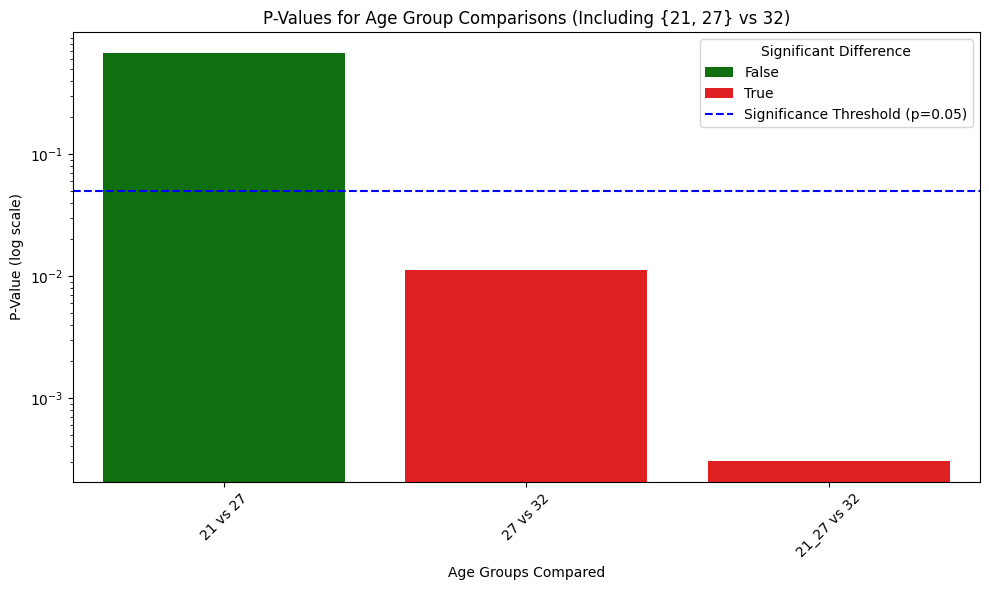

In [36]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Example structure:
# df = pd.DataFrame({
#     'AgeCategory': [21, 27, 32, 32, 32, 21, 27],
#     'HadHeartAttack': [0, 1, 1, 0, 1, 0, 1]
# })

# Combine age groups 21 and 27 into one group called '21_27'
df['GroupedAge'] = df['AgeCategory'].replace({21: '21_27', 27: '21_27'})

# Filter data for the two groups: combined group '21_27' and age group 32
group_21_27 = df[df['GroupedAge'] == '21_27']
group_32 = df[df['AgeCategory'] == 32]

# Count heart attacks and total number of people in each group
count = [group_21_27['HadHeartAttack'].sum(), group_32['HadHeartAttack'].sum()]
nobs = [len(group_21_27), len(group_32)]

# Perform the z-test for proportions
stat, p_value = proportions_ztest(count, nobs)

# Now create a DataFrame with results from multiple comparisons
results = pd.DataFrame({
    'AgeGroup1': [21, 27, '21_27'],
    'AgeGroup2': [27, 32, 32],
    'P-Value': [0.6786407, 0.01123395, p_value],  # Use the earlier p-values, and add the new one
    'Significant': [False, True, p_value < 0.05]  # Mark significance for the new comparison
})

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))

# Barplot showing p-values and highlighting significant differences
sns.barplot(x=results['AgeGroup1'].astype(str) + ' vs ' + results['AgeGroup2'].astype(str),
            y=results['P-Value'], hue=results['Significant'], palette={True: 'red', False: 'green'})

# Highlight the significance threshold line (p = 0.05)
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Threshold (p=0.05)')

# Logarithmic scale to visualize small p-values
plt.yscale('log')

# Add titles and labels
plt.title('P-Values for Age Group Comparisons (Including {21, 27} vs 32)')
plt.xlabel('Age Groups Compared')
plt.ylabel('P-Value (log scale)')
plt.xticks(rotation=45)
plt.legend(title="Significant Difference")

# Show the plot
plt.tight_layout()
plt.show()


## We can know divide all people into groups, and in each group to guess what is the chance for a heart rate.